In [6]:
import json
import utils
import time
import numpy as np

import importance_measures.sharpSAT as ssat
import importance_measures.bdds as bdd

def test_bdd_satcount(model, n, m, k, dataset, tries=10):
    modeltimes, satcounttimes, overalltimes = [], [], []
    for _ in range(tries):
        # model.gbc()
        _, formula = utils.random_k_sat(n, m, k) 
        start = time.time()
        f = model.node(formula)
        end1 = time.time()
        f.satcount
        end2 = time.time()
        del f
        modeltime, satcounttime, overalltime = end1-start, end2-end1, end2-start
        modeltimes.append(modeltime*1000)
        satcounttimes.append(satcounttime*1000)
        overalltimes.append(overalltime*1000)
    ds = dataset["bdd"]["satcount"]
    ds["modeltime"]["mean"].append(np.mean(modeltimes))
    ds["satcount"]["mean"].append(np.mean(satcounttimes))
    ds["overall"]["mean"].append(np.mean(overalltimes))
    ds["modeltime"]["var"].append(np.var(modeltimes))
    ds["satcount"]["var"].append(np.var(satcounttimes))
    ds["overall"]["var"].append(np.var(overalltimes))

def test_bdd_influence(model, n, m, k, dataset, tries=10):
    modeltimes, influencetimes, overalltimes = [], [], []
    for _ in range(tries):
        # model.gbc()
        _, formula = utils.random_k_sat(n, m, k) 
        start = time.time()
        f = model.node(formula)
        end1 = time.time()
        bdd.influence(f, "x1") 
        end2 = time.time()
        del f
        modeltime, influencetime, overalltime = end1-start, end2-end1, end2-start
        modeltimes.append(modeltime*1000)
        influencetimes.append(influencetime*1000)
        overalltimes.append(overalltime*1000)
    ds = dataset["bdd"]["influence"]
    ds["modeltime"]["mean"].append(np.mean(modeltimes))
    ds["influence"]["mean"].append(np.mean(influencetimes))
    ds["overall"]["mean"].append(np.mean(overalltimes))
    ds["modeltime"]["var"].append(np.var(modeltimes))
    ds["influence"]["var"].append(np.var(influencetimes))
    ds["overall"]["var"].append(np.var(overalltimes))

def test_bdd_blame(model, n, m, k, dataset, tries=10, key="blame", cutoff=0):
    modeltimes, blametimes, overalltimes = [], [], []
    for _ in range(tries):
        # model.gbc()
        _, formula = utils.random_k_sat(n, m, k) 
        start = time.time()
        f = model.node(formula)
        end1 = time.time()
        bdd.blame(f, "x1", cutoff=cutoff) 
        end2 = time.time()
        del f
        modeltime, blametime, overalltime = end1-start, end2-end1, end2-start
        modeltimes.append(modeltime*1000)
        blametimes.append(blametime*1000)
        overalltimes.append(overalltime*1000)
    ds = dataset["bdd"][key]
    ds["modeltime"]["mean"].append(np.mean(modeltimes))
    ds["blame"]["mean"].append(np.mean(blametimes))
    ds["overall"]["mean"].append(np.mean(overalltimes))
    ds["modeltime"]["var"].append(np.var(modeltimes))
    ds["blame"]["var"].append(np.var(blametimes))
    ds["overall"]["var"].append(np.var(overalltimes))

def test_bdd_omega(model, n, m, k, dataset, tries=10):
    modeltimes, omegatimes, overalltimes = [], [], []
    for _ in range(tries):
        # model.gbc()
        _, formula = utils.random_k_sat(n, m, k) 
        start = time.time()
        f = model.node(formula)
        end1 = time.time()
        bdd.omega(f) 
        end2 = time.time()
        del f
        modeltime, omegatime, overalltime = end1-start, end2-end1, end2-start
        modeltimes.append(modeltime*1000)
        omegatimes.append(omegatime*1000)
        overalltimes.append(overalltime*1000)
    ds = dataset["bdd"]["omega"]
    ds["modeltime"]["mean"].append(np.mean(modeltimes))
    ds["omega"]["mean"].append(np.mean(omegatimes))
    ds["overall"]["mean"].append(np.mean(overalltimes))
    ds["modeltime"]["var"].append(np.var(modeltimes))
    ds["omega"]["var"].append(np.var(omegatimes))
    ds["overall"]["var"].append(np.var(overalltimes))

def test_sharpsat_td_satcount(n, m, k, dataset, tries=10):
    on_cnfs, on_tseytins = [], []
    for _ in range(tries):
        cnf, formula = utils.random_k_sat(n, m, k) 
        solver = ssat.SharpSAT(decot=0.0002)
        start = time.time()
        solver.satcount(cnf)
        end1 = time.time()
        solver.satcount(ssat.Formula.parse(formula))
        end2 = time.time()
        on_cnf, on_tseytin = end1-start, end2-end1
        on_cnfs.append(on_cnf*1000)
        on_tseytins.append(on_tseytin*1000)
    ds = dataset["sharpSAT-td"]["satcount"]
    ds["on_cnf"]["mean"].append(np.mean(on_cnfs))
    ds["on_tseytin"]["mean"].append(np.mean(on_tseytins))
    ds["on_cnf"]["var"].append(np.var(on_cnfs))
    ds["on_tseytin"]["var"].append(np.var(on_tseytins))

def test_sharpsat_td_influence(n, m, k, dataset, tries=10):
    influences = []
    for _ in range(tries):
        _, formula = utils.random_k_sat(n, m, k) 
        f = ssat.Formula.parse(formula)
        solver = ssat.SharpSAT(decot=0.0002)
        start = time.time()
        ssat.influence(f, "x1", solver)
        end = time.time()
        influencetime = end-start
        influences.append(influencetime*1000)
    ds = dataset["sharpSAT-td"]["influence"]
    ds["influence"]["mean"].append(np.mean(influences))
    ds["influence"]["var"].append(np.var(influences))


dataset = {
    "instances": [],
    "bdd": {
        "satcount": {
            "modeltime": { "mean": [], "var": [] },
            "satcount": { "mean": [], "var": [] },
            "overall": { "mean": [], "var": [] } 
        },
        "influence": {
            "modeltime": { "mean": [], "var": [] },
            "influence": { "mean": [], "var": [] },
            "overall": { "mean": [], "var": [] } 
        },
        "blame_cutoff_low": {
            "modeltime": { "mean": [], "var": [] },
            "blame": { "mean": [], "var": [] },
            "overall": { "mean": [], "var": [] } 
        },
        "blame_cutoff_high": {
            "modeltime": { "mean": [], "var": [] },
            "blame": { "mean": [], "var": [] },
            "overall": { "mean": [], "var": [] } 
        },
        "omega": {
            "modeltime": { "mean": [], "var": [] },
            "omega": { "mean": [], "var": [] },
            "overall": { "mean": [], "var": [] } 
        }
    },
    "sharpSAT-td": {
        "satcount": {
            "on_cnf": { "mean": [], "var": [] },
            "on_tseytin": { "mean": [], "var": [] } 
        },
        "influence": {
            "influence": { "mean": [], "var": [] },
        }
    }
}

# approx hard instances for clauses / n = 3
# (see e.g. https://www.cs.cornell.edu/selman/papers/pdf/96.aij.generating.pdf)
k, clause_to_variables = 3, 3 
for n in range(10, 34, 3):
    m = int(n*clause_to_variables) 
    dataset["instances"].append(n)
    print(f"testing bdd/sharpSAT-td on n={n} m={m} k={k}")
    vars = [f"x{idx+1}" for idx in range(n)]
    with bdd.Buddy(vars) as model:
        print("...bdd satcount")
        test_bdd_satcount(model, n, m, k, dataset)
        # model.gbc()
        print("...bdd influence")
        test_bdd_influence(model, n, m, k, dataset)
        # model.gbc()
        print("...bdd blame (low cutoff)")
        test_bdd_blame(model, n, m, k, dataset, key="blame_cutoff_low", cutoff=0)
        # model.gbc()
        print("...bdd blame (high cutoff)")
        test_bdd_blame(model, n, m, k, dataset, key="blame_cutoff_high", cutoff=0.1)
        print("...bdd omega")
        test_bdd_omega(model, n, m, k, dataset)
    print("...sharpSAT-td satcount")
    test_sharpsat_td_satcount(n, m, k, dataset)
    print("...sharpSAT-td influence")
    test_sharpsat_td_influence(n, m, k, dataset)

    with open("statistics.json", "w") as fw:
        json.dump(dataset, fw)

testing bdd/sharpSAT-td on n=10 m=30 k=3
...bdd satcount
...bdd influence
...bdd blame (low cutoff)
...bdd blame (high cutoff)
...bdd omega
...sharpSAT-td satcount
...sharpSAT-td influence
testing bdd/sharpSAT-td on n=13 m=39 k=3
...bdd satcount
...bdd influence
...bdd blame (low cutoff)
...bdd blame (high cutoff)
...bdd omega
...sharpSAT-td satcount
...sharpSAT-td influence
testing bdd/sharpSAT-td on n=16 m=48 k=3
...bdd satcount
...bdd influence
...bdd blame (low cutoff)
...bdd blame (high cutoff)
...bdd omega
...sharpSAT-td satcount
...sharpSAT-td influence
testing bdd/sharpSAT-td on n=19 m=57 k=3
...bdd satcount
...bdd influence
...bdd blame (low cutoff)
...bdd blame (high cutoff)
...bdd omega
...sharpSAT-td satcount
...sharpSAT-td influence
testing bdd/sharpSAT-td on n=22 m=66 k=3
...bdd satcount
...bdd influence
...bdd blame (low cutoff)
...bdd blame (high cutoff)
...bdd omega
...sharpSAT-td satcount
...sharpSAT-td influence
testing bdd/sharpSAT-td on n=25 m=75 k=3
...bdd satcoun

KeyboardInterrupt: 

In [12]:
import json 

with open("statistics.json") as fr:
    ds = json.load(fr)

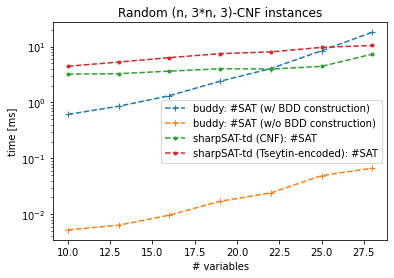

In [13]:
import matplotlib.pyplot as plt 

instances = ds["instances"]
times_bdd = ds["bdd"]["satcount"]["overall"]["mean"]
times_sat_bdd = ds["bdd"]["satcount"]["satcount"]["mean"]
times_tseytin_ssat = ds["sharpSAT-td"]["satcount"]["on_tseytin"]["mean"]
times_cnf_ssat = ds["sharpSAT-td"]["satcount"]["on_cnf"]["mean"]
plt.plot(instances, times_bdd, "+--", label="buddy: #SAT (w/ BDD construction)")
plt.plot(instances, times_sat_bdd, "+--", label="buddy: #SAT (w/o BDD construction)")
plt.plot(instances, times_cnf_ssat, ".--", label="sharpSAT-td (CNF): #SAT")
plt.plot(instances, times_tseytin_ssat, ".--", label="sharpSAT-td (Tseytin-encoded): #SAT")
plt.legend()
plt.xlabel("# variables")
plt.ylabel("time [ms]")
plt.title("Random (n, 3*n, 3)-CNF instances")
plt.yscale("log")
plt.show()

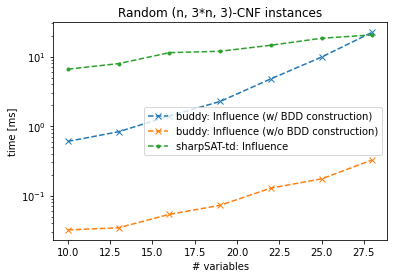

In [14]:
import matplotlib.pyplot as plt 

instances = ds["instances"]
times_bdd = ds["bdd"]["influence"]["overall"]["mean"]
times_infl_bdd = ds["bdd"]["influence"]["influence"]["mean"]
times_ssat = ds["sharpSAT-td"]["influence"]["influence"]["mean"]

plt.plot(instances, times_bdd, "x--", label="buddy: Influence (w/ BDD construction)")
plt.plot(instances, times_infl_bdd, "x--", label="buddy: Influence (w/o BDD construction)")
plt.plot(instances, times_ssat, ".--", label="sharpSAT-td: Influence")
plt.legend()
plt.xlabel("# variables")
plt.ylabel("time [ms]")
plt.title("Random (n, 3*n, 3)-CNF instances")
plt.yscale("log")
plt.show()

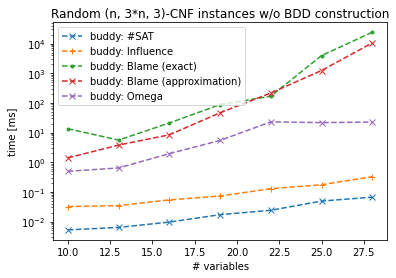

In [16]:
import matplotlib.pyplot as plt 

instances = ds["instances"]
times_infl_bdd = ds["bdd"]["influence"]["influence"]["mean"]
times_blame_lc_bdd = ds["bdd"]["blame_cutoff_low"]["blame"]["mean"]
times_blame_hc_bdd = ds["bdd"]["blame_cutoff_high"]["blame"]["mean"]
times_omega_bdd = ds["bdd"]["omega"]["omega"]["mean"]
times_satc_bdd = ds["bdd"]["satcount"]["satcount"]["mean"]

plt.plot(instances, times_satc_bdd, "x--", label="buddy: #SAT")
plt.plot(instances, times_infl_bdd, "+--", label="buddy: Influence")
plt.plot(instances, times_blame_lc_bdd, ".--", label="buddy: Blame (exact)")
plt.plot(instances, times_blame_hc_bdd, "x--", label="buddy: Blame (approximation)")
plt.plot(instances, times_omega_bdd, "x--", label="buddy: Omega")
plt.legend()
plt.xlabel("# variables")
plt.ylabel("time [ms]")
plt.title("Random (n, 3*n, 3)-CNF instances w/o BDD construction")
plt.yscale("log")
plt.show()
